In [9]:
import pandas as pd
import numpy as np
import pickle 
import torch
from data.prepareData import prepareDataLoader_fromPkl
import matplotlib.pyplot as plt
from scripts.visualisation import plot_cpg_reconstruction, plot_activations_latSpace
import seaborn as sns
from tensorflow.python.summary.summary_iterator import summary_iterator

# AE with Dropout - trial

In [28]:
################################ Early stopping allowed ################################

!python train_AE_dropout.py --name addDropout/latSize_10_v2 \
                    --train_file chr22_overlap_train_methyl_array.pkl \
                    --val_file chr22_overlap_val_methyl_array.pkl \
                    --hidden_layer_encoder_topology 2000 500 \
                    --latentSize 10 \
                    --learning_rate 1e-04 \
                    --n_epochs 500 \
                    --patienceEarlyStopping 10

normalAE_dropout(
  (encoder): Sequential(
    (0): Linear(in_features=4671, out_features=2000, bias=True)
    (1): Dropout(p=0.3, inplace=False)
    (2): PReLU(num_parameters=1)
    (3): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Linear(in_features=2000, out_features=500, bias=True)
    (5): Dropout(p=0.3, inplace=False)
    (6): PReLU(num_parameters=1)
    (7): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Linear(in_features=500, out_features=10, bias=True)
    (9): PReLU(num_parameters=1)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=500, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=500, out_features=2000, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=2000, out_features=4671, bias=True)
    (5): Sigmoid()
  )
)
		Logging to logs/addDropout/latSize_10_v2/checkpoint
cpu
Epoch: 1
Training Loss: 313570.912
Validation

In [11]:
PATH_data = "data"
PATH_results = "logs"

with open(os.path.join(PATH_data, "chr22_overlap_test_methyl_array.pkl"), "rb") as f: test_dataset = pickle.load(f) #
test_tensor = torch.tensor(test_dataset["beta"].values, dtype=torch.float32)

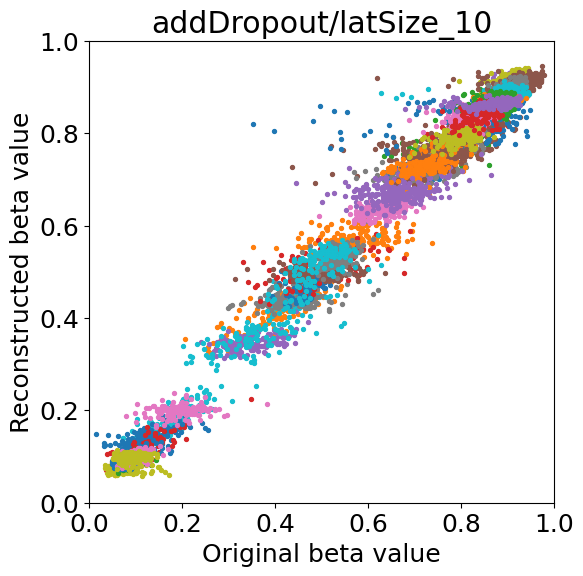

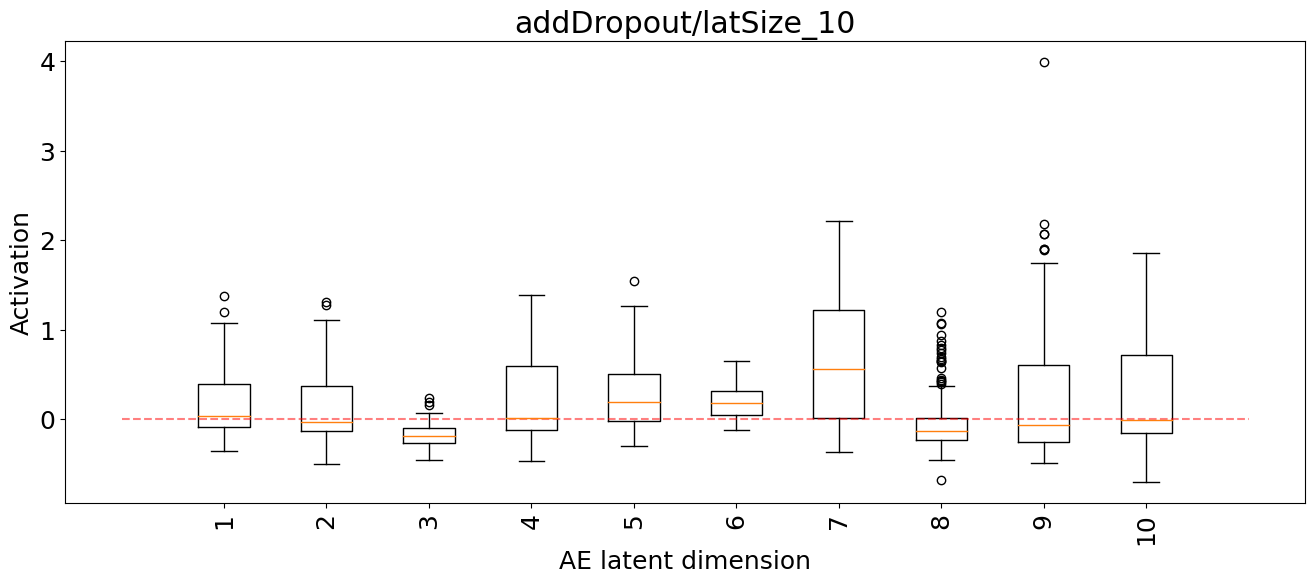

In [13]:
name = "addDropout/latSize_10"
model = torch.load(f"logs/{name}/checkpoint/trainedModel.pth", map_location=torch.device('cpu'))

plot_cpg_reconstruction(model, test_tensor, title=name)
plot_activations_latSpace(model, test_tensor, title=name)